<a href="https://colab.research.google.com/github/larijanim/pathrise/blob/main/Maryam_project_pathrise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
#uploaded=files.upload()
df=pd.read_excel('/content/sample_data/Data_Pathrise.xlsx')

**Question: **

The main goal of your analysis is to derive insights around if a fellow will
ultimately be placed at a company and how long until a placement can be

# **Cleaning Data**
Objective: The main goal of data cleaning is to address issues and inconsistencies in the raw data, ensuring it is accurate, complete, and ready for analysis.
Tasks: Handling missing values, removing duplicates, dealing with outliers, correcting errors, and transforming data types fall under data cleaning.
Example: If there are missing values in a column, you might choose to impute them with a certain strategy (mean, median, etc.) or drop rows or columns with missing values.

## **Exploratory Data Analysis (EDA):**
It's essential to perform exploratory data analysis (EDA) and possibly feature engineering to better understand the relationships between these columns and the target variable (placement) before building a machine learning model. Additionally, handling missing values and encoding categorical variables appropriately are important preprocessing steps.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat


```
The main goal of your analysis is to derive insights around if a fellow will
ultimately be placed at a company and how long until a placement can be

```


**2-Understanding Data:**

Display basic information about the dataset using df.info() and df.describe().
Check for missing values using df.isnull().sum().

In [ ]:
df.describe() # آمار توصیفی

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [ ]:
df.dtypes # نوع داده‌ها

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

In [ ]:
df.isnull().sum() # it show some columns havn't much data


id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

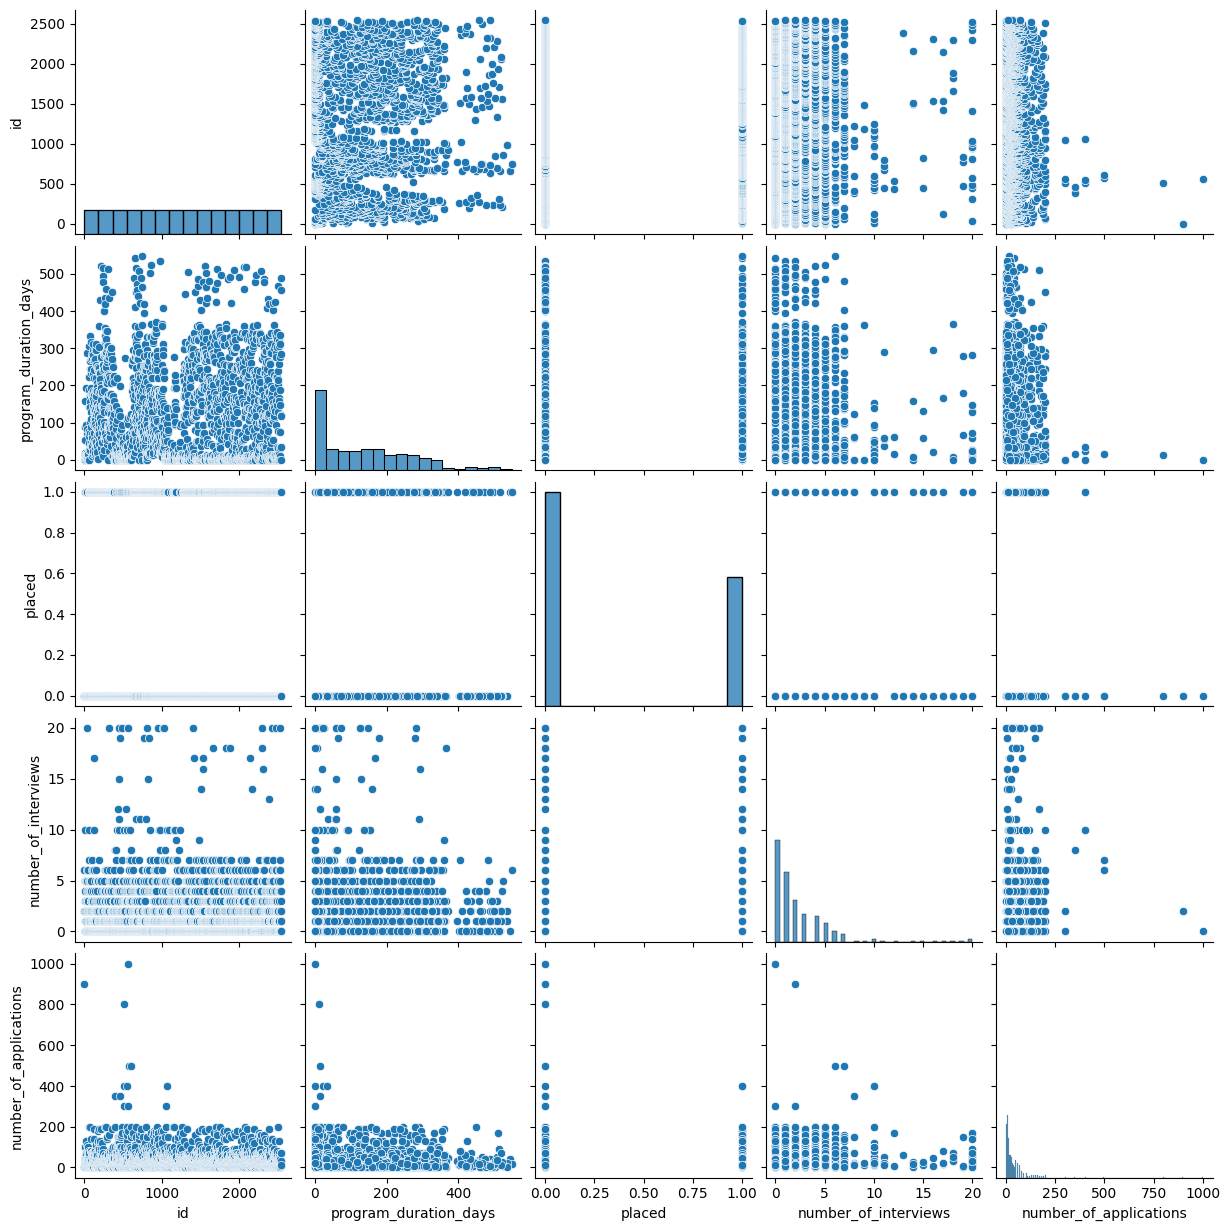

In [ ]:
sns.pairplot(df)

<Axes: xlabel='placed', ylabel='Count'>

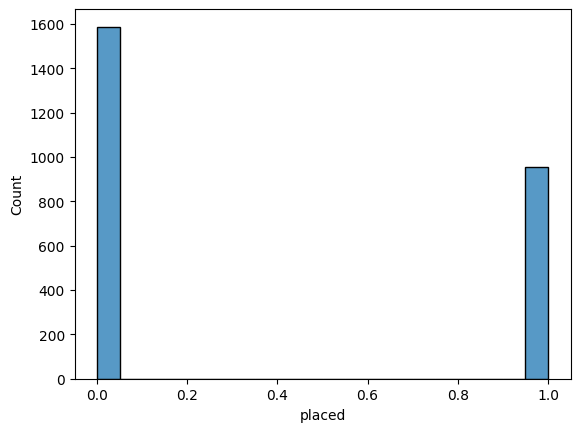

In [ ]:
sns.histplot(df['placed'],bins=20,kde=False)

<Axes: xlabel='program_duration_days', ylabel='Count'>

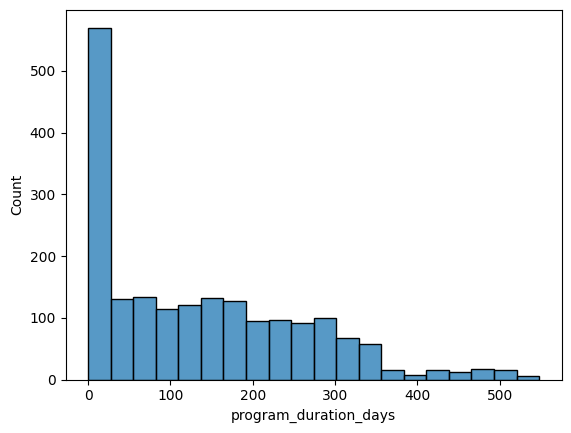

In [ ]:
sns.histplot(df['program_duration_days'],bins=20,kde=False)
#sns.histplot(df['program_duration_days'], hist=True, kde=True, bins=20, color = 'darkblue',
            # hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

<Axes: xlabel='program_duration_days', ylabel='Count'>

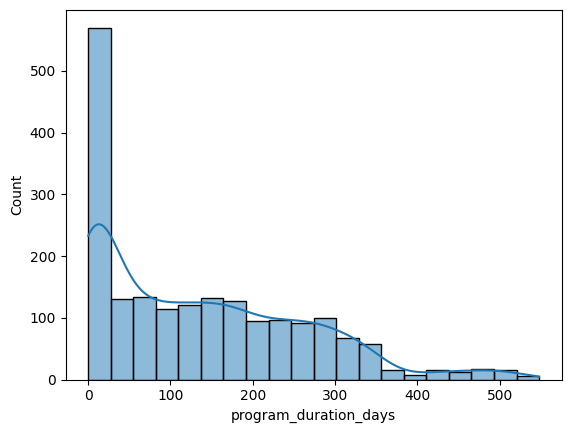

In [ ]:
sns.histplot(df['program_duration_days'], kde=True, bins=20)
 #sns.histplot(df['program_duration_days'], hist=True, kde=True, bins=20, color='darkblue',
 #            hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4},
  #           line_kws={'linewidth': 4})




In [ ]:
df.highest_level_of_education.describe()

count                  2486
unique                    7
top       Bachelor's Degree
freq                   1361
Name: highest_level_of_education, dtype: object

In [ ]:
df.pathrise_status.unique()

array(['Active', 'Closed Lost', 'Placed', 'Withdrawn (Failed)',
       'Withdrawn (Trial)', 'Withdrawn', 'Deferred', 'Break', 'MIA'],
      dtype=object)

In [ ]:
df.primary_track.unique()

array(['SWE', 'PSO', 'Design', 'Data', 'Web', 'Marketing'], dtype=object)

In [ ]:
df.highest_level_of_education.unique()

array(["Bachelor's Degree", 'Some College, No Degree', "Master's Degree",
       nan, 'Doctorate or Professional Degree', 'High School Graduate',
       'GED or equivalent', 'Some High School'], dtype=object)

In [ ]:
df.highest_level_of_education.value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

In [ ]:
df.length_of_job_search.value_counts()

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

In [ ]:
df.biggest_challenge_in_search.unique()

array(['Hearing back on my applications',
       'Getting past final round interviews',
       'Figuring out which jobs to apply for', 'Technical interviewing',
       'Getting past phone screens', 'Lack of relevant experience',
       'Technical skills', 'Getting past mid-stage interviews',
       'Behavioral interviewing', 'Resume gap', nan], dtype=object)

In [ ]:
df.professional_experience.unique()

array(['3-4 years', '1-2 years', 'Less than one year', '5+ years', nan],
      dtype=object)

In [ ]:
pd.set_option('display.max_rows', 100)
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [ ]:
df.tail()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify
2543,2544,Withdrawn,SWE,OCT19A,285.0,0,Student,Master's Degree,1-2 months,Hearing back on my applications,1-2 years,Green Card,3.0,70,Male,Non-Hispanic White or Euro-American


**3- Visualize Distributions:**

Create histograms or kernel density plots to visualize the distributions of numeric columns.

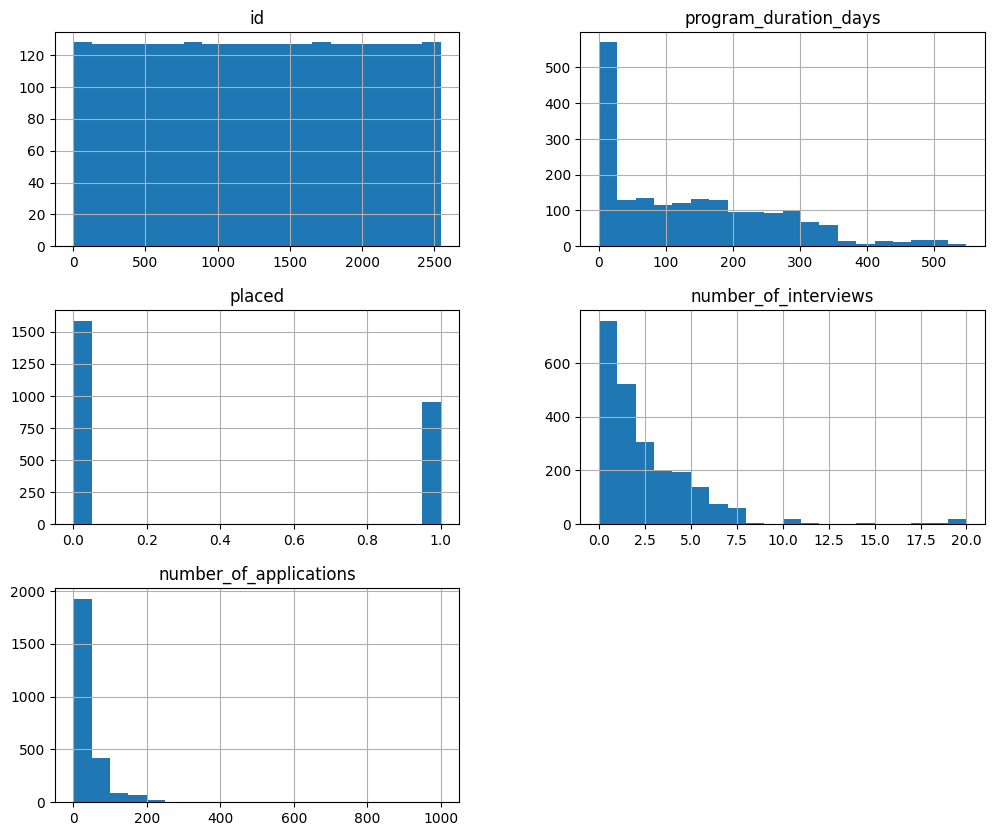

In [ ]:
# Visualize distribution of numeric columns
df.hist(figsize=(12, 10), bins=20)
plt.show()

**4. Explore Categorical Variables:**

Use bar charts to visualize the distribution of categorical variables.

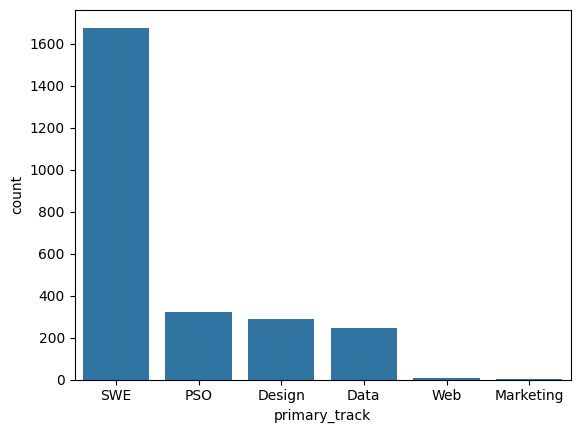

In [ ]:
# Visualize distribution of categorical variables
sns.countplot(x='primary_track', data=df)
plt.show()

**5. Correlation Analysis:**

Explore correlations between numeric variables using a correlation matrix and heatmap.

<ipython-input-13-62b0d37f8d1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


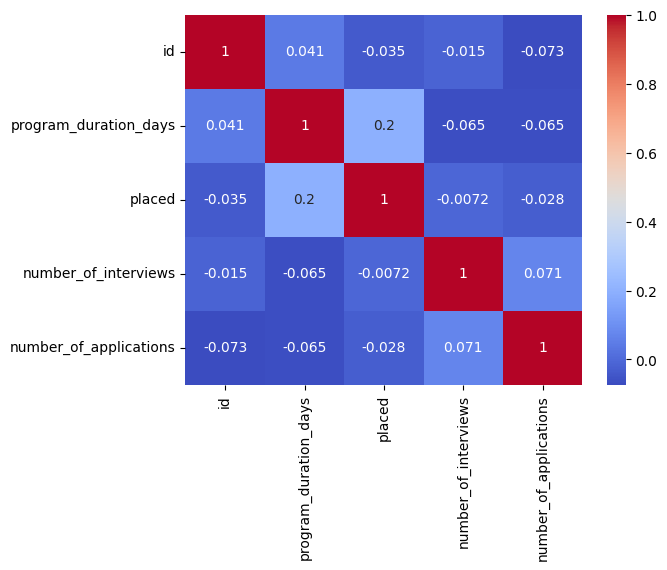

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**6.Explore Relationships:**

Investigate relationships between variables using scatter plots or pair plots.

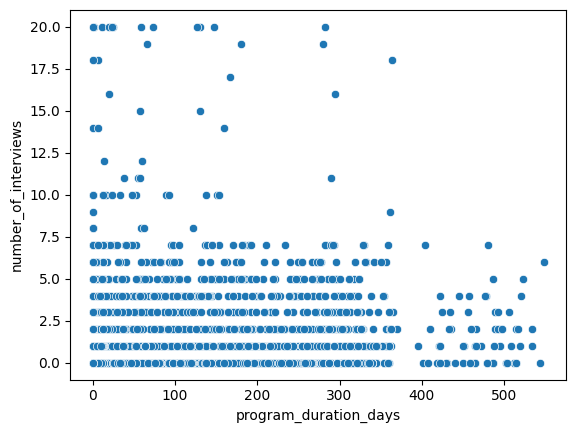

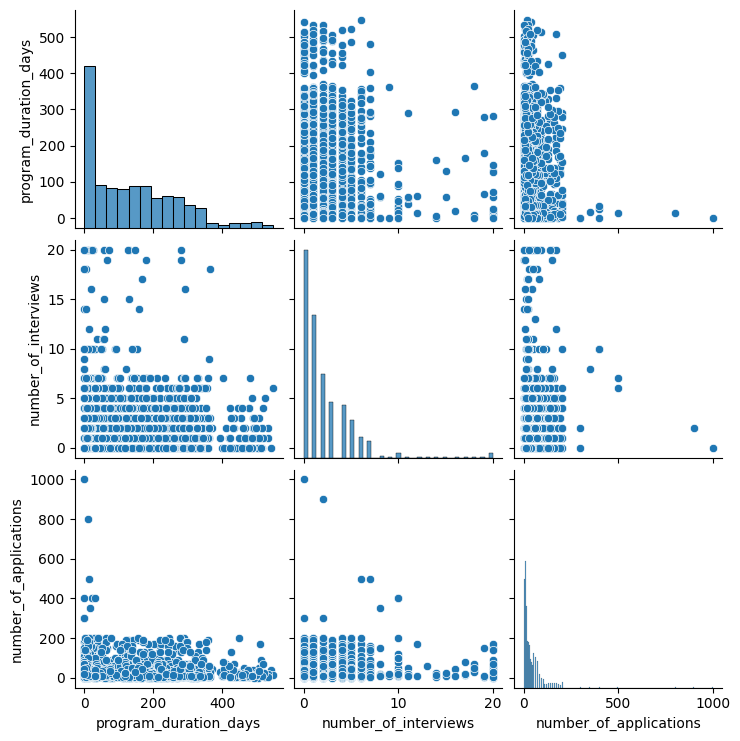

In [ ]:
# Scatter plot between two variables
sns.scatterplot(x='program_duration_days', y='number_of_interviews', data=df)
plt.show()

# Pair plot for multiple variables
sns.pairplot(df[['program_duration_days', 'number_of_interviews', 'number_of_applications']])
plt.show()

## **Feature Engineering:**
**1.Handle Missing Values:**

Decide on a strategy for handling missing values (imputation or removal).

In [ ]:
# Impute missing values (example with mean imputation)
df['program_duration_days'].fillna(df['program_duration_days'].mean(), inplace=True)

**2.Encode Categorical Variables:**

Convert categorical variables into numerical format using one-hot encoding or label encoding.

In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['primary_track', 'employment_status'])

# Label encoding (if applicable)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['employment_status_encoded'] = le.fit_transform(df['employment_status'])

**3.Create New Features:**

Consider creating new features that might capture additional information.

In [ ]:
# Example: Create a feature for the ratio of interviews to applications
df['interviews_to_applications_ratio'] = df['number_of_interviews'] / df['number_of_applications']

**4.Binning Numeric Variables:**

Bin numeric variables if it makes sense for your analysis.

In [ ]:
# Example: Bin program duration into categories
df['program_duration_category'] = pd.cut(df['program_duration_days'], bins=[0, 30, 60, 90], labels=['Short', 'Medium', 'Long'])

**5.Handle Outliers:**

Decide on a strategy for handling outliers (removal or transformation).

In [ ]:
# Example: Remove outliers using z-score
from scipy.stats import zscore
df_no_outliers = df[(np.abs(zscore(df['program_duration_days'])) < 3)]

**6.Feature Scaling (if necessary):**

Scale features if your machine learning algorithm requires it.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['program_duration_days', 'number_of_interviews']])

**7.Final Check:**

Recheck the dataset for any missing values or unusual patterns after feature engineering.

In [ ]:
# Check for missing values
print(df.isnull().sum())